# Logistic Regression Project Exercise - Solutions

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

**Complete the TASKs written in bold below.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [2]:
df = pd.read_csv('..\data\heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## Explonatory Data Analysis and Visualize

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


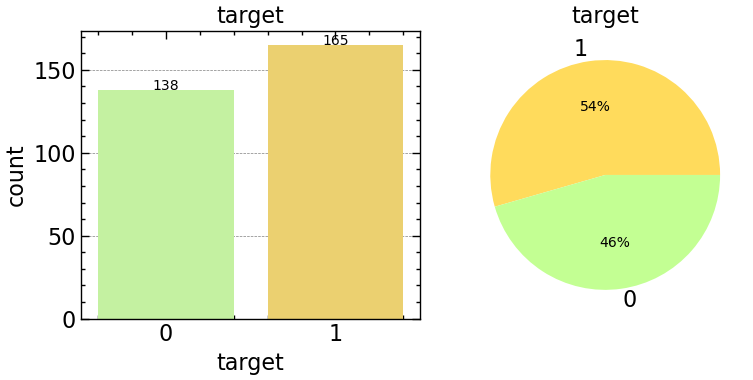

In [7]:
plt.style.use(['science','notebook', 'grid'])

plt.figure(figsize=(8,4))

variable = 'target'

plt.subplot(1,2,1)
ax = sns.countplot(x = variable, data= df, palette=['#C3FF93','#FFDB5C'])
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width() /2, 
            y = height , 
            s = '{:.0f}'.format(height), 
            ha = 'center'
           )
plt.title(variable)

# pie chart
plt.subplot(1,2,2)
counts = df['target'].value_counts()
colors = sns.color_palette(['#FFDB5C','#C3FF93'])
plt.pie(counts, labels = counts.index, autopct='%0.f%%', colors= colors)
plt.title(variable)

plt.tight_layout()
plt.show()

In [8]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

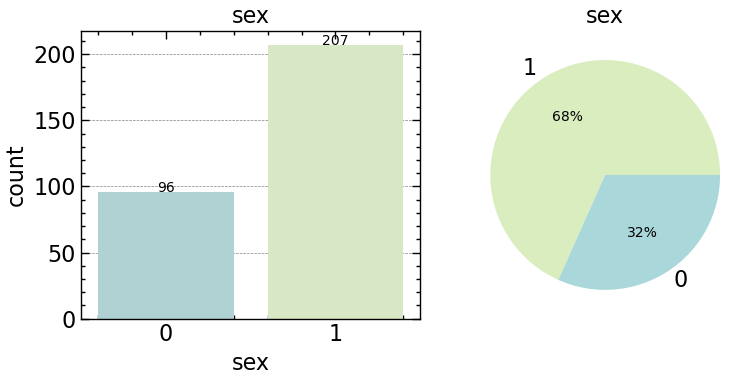

In [9]:
plt.style.use(['science','notebook', 'grid'])

plt.figure(figsize=(8,4))

variable = 'sex'

plt.subplot(1,2,1)
ax = sns.countplot(x =variable, data= df, palette=['#AAD7D9','#D9EDBF'])
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width() /2, 
            y = height , 
            s = '{:.0f}'.format(height), 
            ha = 'center'
           )
plt.title(variable)

# pie chart
plt.subplot(1,2,2)
counts = df['sex'].value_counts()
colors = sns.color_palette(['#D9EDBF','#AAD7D9'])
plt.pie(counts, labels = counts.index, autopct='%0.f%%', colors= colors)
plt.title(variable)

plt.tight_layout()
plt.show()

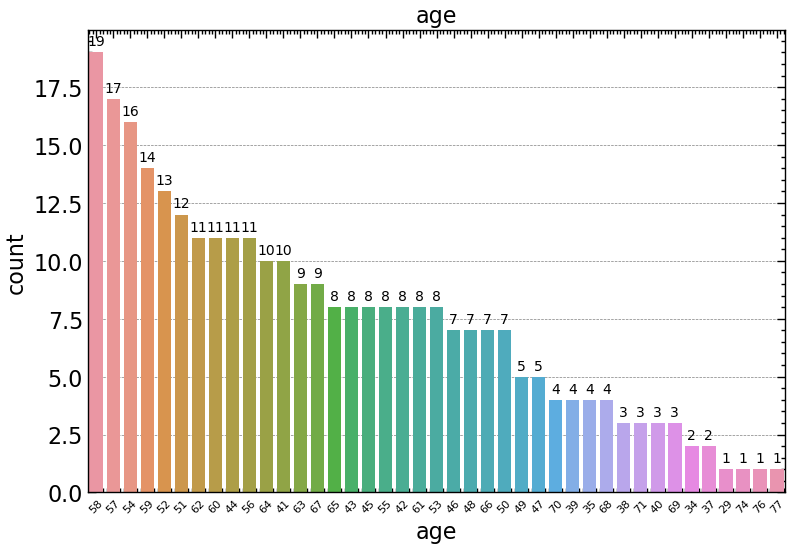

In [10]:
plt.style.use(['science','notebook', 'grid'])

plt.figure(figsize=(9,6))

variable = 'age'

ax = sns.countplot(x = variable, data= df, order = df[variable].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width() /2, 
            y = height + 0.3 , 
            s = '{:.0f}'.format(height), 
            ha = 'center',
            size = 10
           )
plt.title(variable)
plt.xticks(rotation = 45 ,size=8)

plt.show()

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

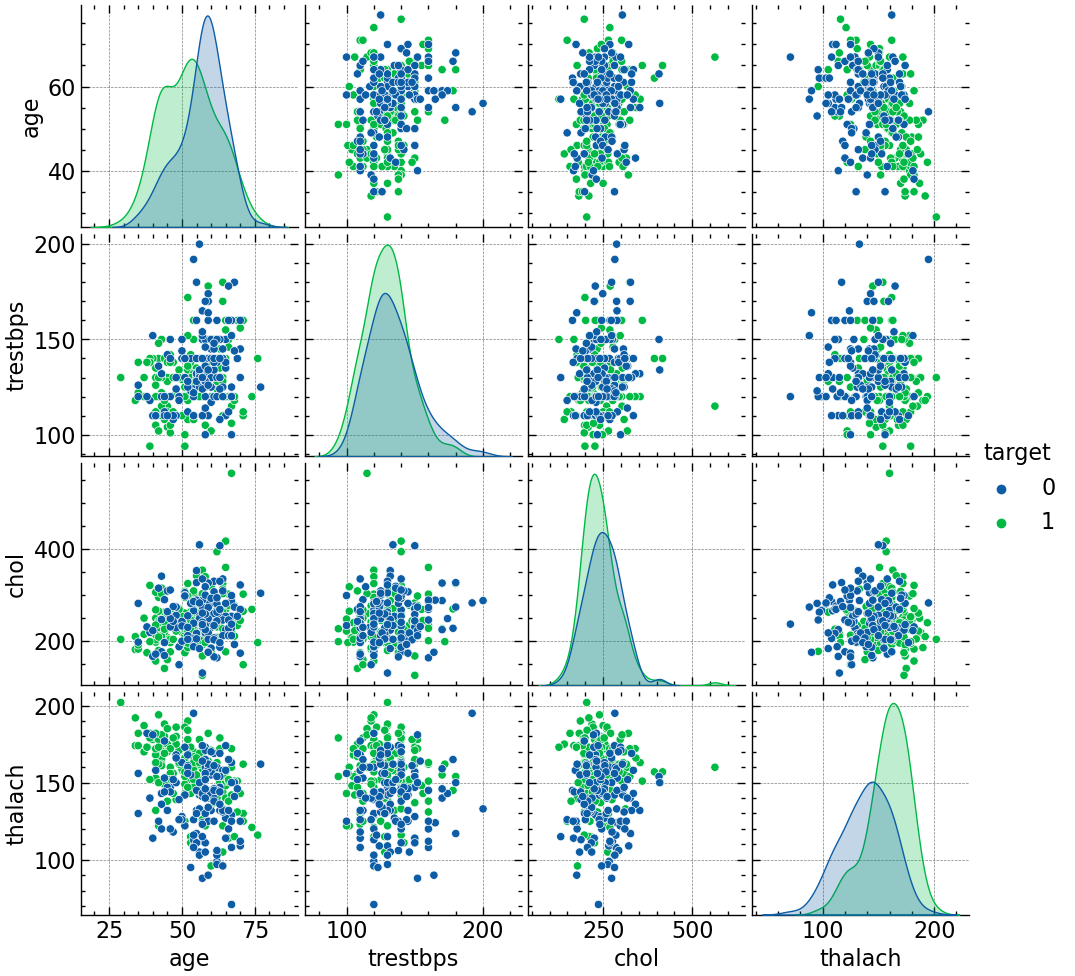

In [12]:
# Running pairplot on everything will take a very long time to render!
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']], hue='target');

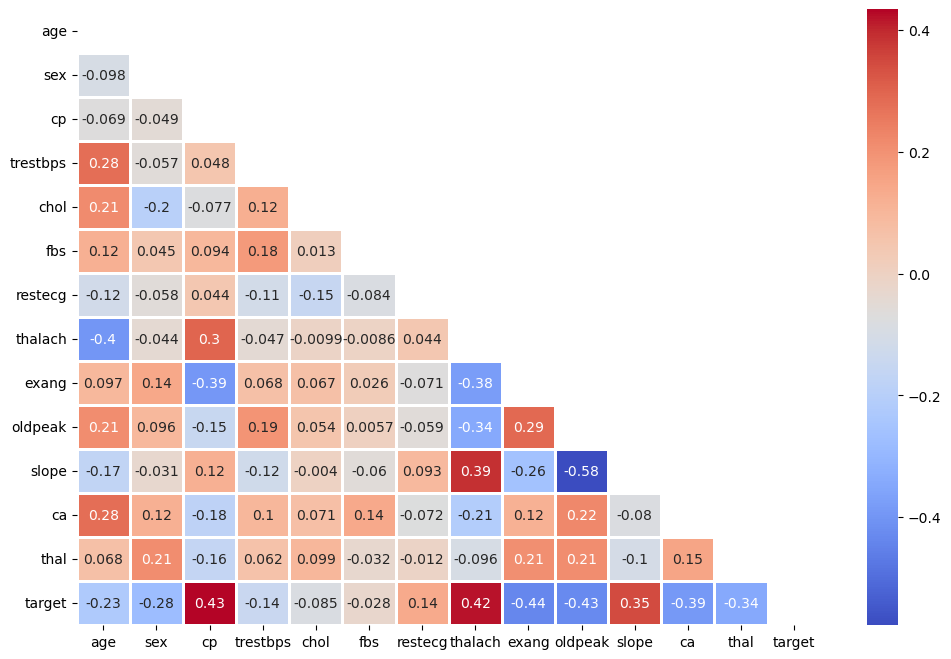

In [13]:
plt.style.use('default')
# matrix
metrix = df.corr()
# mask
mask = np.zeros_like(metrix)
mask[np.triu_indices_from(metrix)]=True

# heatmap
plt.figure(figsize= (12, 8))
sns.heatmap(metrix, mask=mask, lw= 1, annot=True, cmap='coolwarm');

----
--- 
## Machine Learning

**Craeate X and y**

In [14]:
X = df.drop('target', axis=1)
y = df['target']

### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 101)

### Scale data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

### Create Model LogisticRegressionCV

In [20]:
from sklearn.linear_model import LogisticRegressionCV

In [21]:
log_model = LogisticRegressionCV()

In [22]:
log_model.fit(scaler_X_train, y_train)

LogisticRegressionCV()

**Report back your search's optimal parameters, specifically the C value.**

In [23]:
log_model.C_

array([0.04641589])

In [24]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

### Coeffecients

In [25]:
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

In [26]:
coefs = pd.Series(index = X.columns, data = log_model.coef_[0])

In [27]:
coefs = coefs.sort_values()

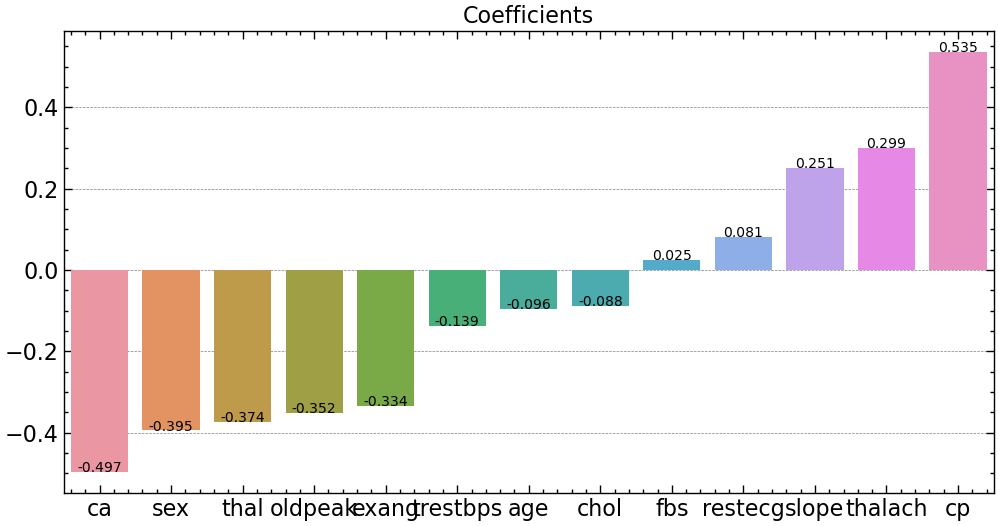

In [28]:
plt.style.use(['science','notebook','grid'])
plt.figure(figsize = (12, 6))
ax = sns.barplot(x= coefs.index, y=coefs.values);

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height ,
            s = '{:.3f}'.format(height),
            ha = 'center'
           )
plt.title('Coefficients');

## Model Performance Evaluation 

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

**Predictions**

In [30]:
prediction = log_model.predict(scaler_X_test)

In [31]:
accuracy_score(y_test, prediction)

0.8387096774193549

In [32]:
confusion_matrix(y_test, prediction)

array([[12,  3],
       [ 2, 14]], dtype=int64)

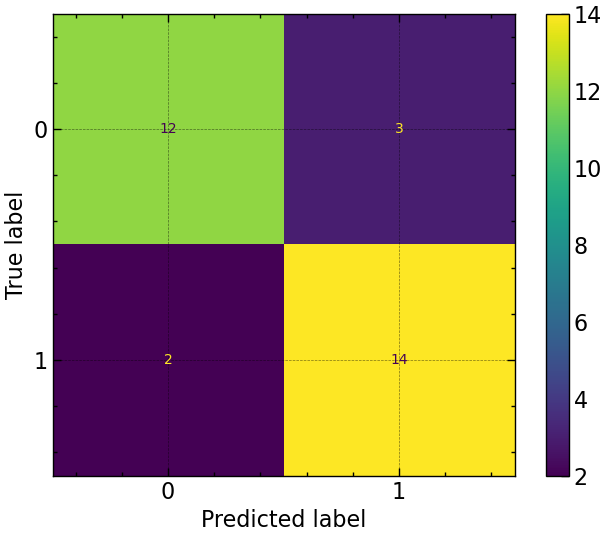

In [33]:
ConfusionMatrixDisplay.from_estimator(log_model, scaler_X_test, y_test);

In [34]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



## Performance Curve

In [35]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

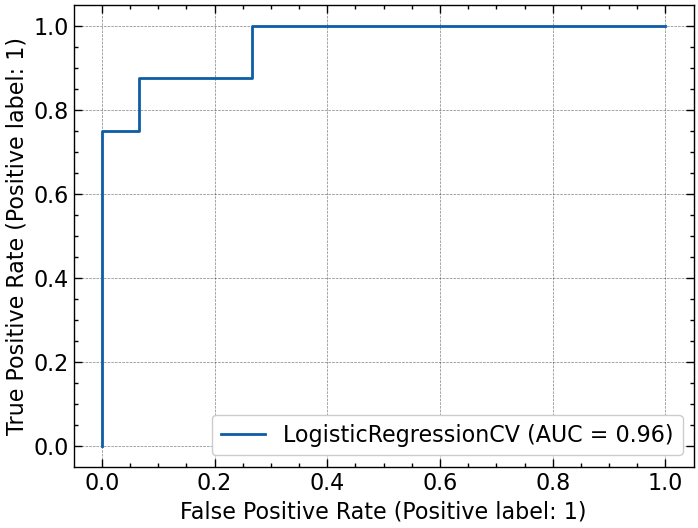

In [36]:
RocCurveDisplay.from_estimator(log_model, scaler_X_test, y_test);

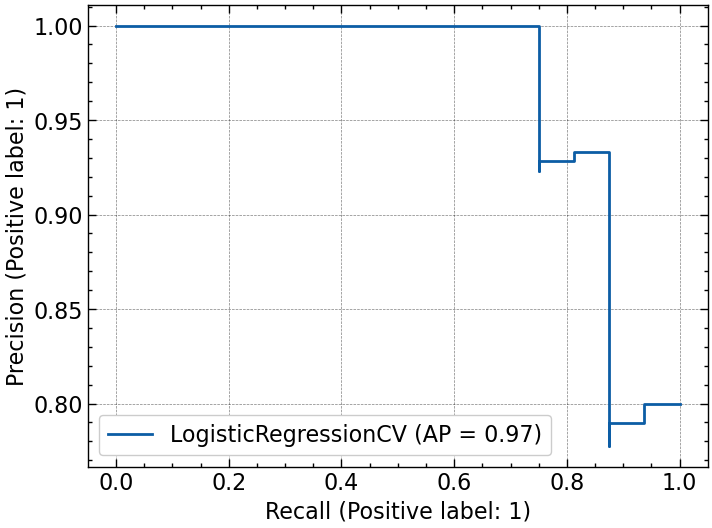

In [37]:
PrecisionRecallDisplay.from_estimator(log_model, scaler_X_test, y_test);